In [45]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [46]:
path1 = r'E:\netData\MAG-nobel\Nobel DC.zip'
path2 = r'E:\netData\MAG-nobel\Nobel CC.zip'
path3 = r'E:\netData\MAG-nobel\Nobel DC CC.zip'
path4 = r'E:\netData\MAG-all\hitlst.zip'

In [12]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)
f4 = pd.read_csv(path4)

In [16]:
f1.columns = ['Nobel', 'Citation', 'paperyear', 'cit', 'journal', 'ref',
       'AUnum', 'title']
f2.columns = ['Nobel', 'Citation', 'paperyear', 'cit', 'journal', 'ref',
       'AUnum', 'title']

In [17]:
f0 = pd.concat([f1 ,f2])

In [18]:
f0['Field'] = f0['Nobel'].map(dict(zip(f3['paperid'] , f3['Field'])))

In [19]:
f3['DCyear'] = f3['DCyear'].apply(lambda x:eval(x))
f3['CCyear'] = f3['CCyear'].apply(lambda x:eval(x))
f3['DCcit']  = f3['DCcit'  ].apply(lambda x:eval(x))
f3['CCcit']  = f3['CCcit'  ].apply(lambda x:eval(x))

In [20]:
f0['hit'] = f0['Citation'].map(dict(zip(f4['0'] , ['hit']*len(f4))))

In [21]:
f0h = f0[f0['hit'] == 'hit']
f0n = f0[f0['hit'] != 'hit']

In [22]:
id1 = 2086860422
id2 = 1559264985
id3 = 2011580247

In [23]:
d01 = f0n[f0n['Nobel'] == id1]
d02 = f0n[f0n['Nobel'] == id2]
d03 = f0n[f0n['Nobel'] == id3]

In [24]:
d01h = f0h[f0h['Nobel'] == id1]
d02h = f0h[f0h['Nobel'] == id2]
d03h = f0h[f0h['Nobel'] == id3]

# fig 3

In [25]:
x1 = d01['paperyear'].values
y1 = d01['cit'].values

In [26]:
x1h = d01h['paperyear'].values
y1h = d01h['cit'].values

In [47]:
len(y1h)

122

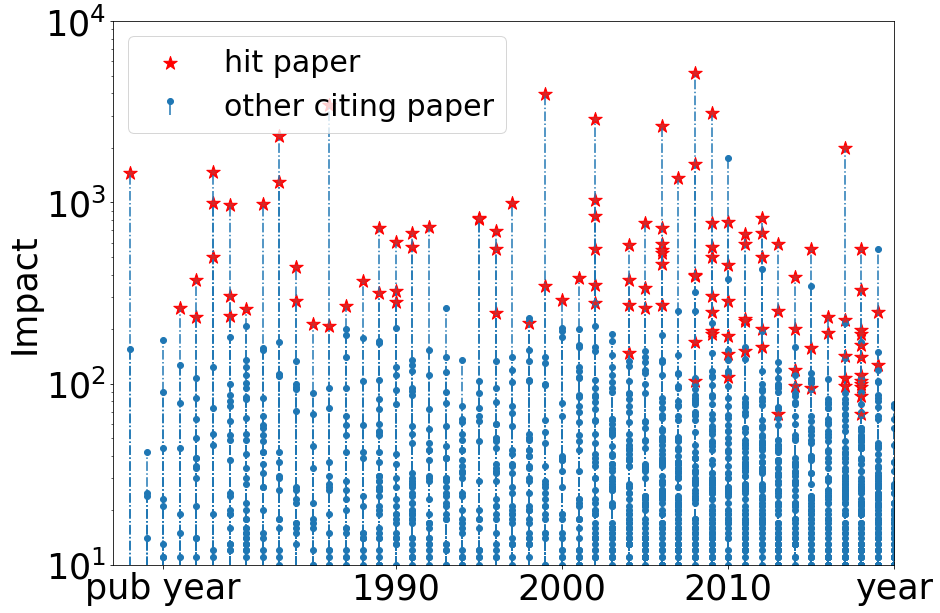

In [49]:
f, ax = plt.subplots(figsize=(14, 10))

ax.stem(x1, y1, linefmt='C0-.', markerfmt='C0o', basefmt=' ' , label = 'other citing paper')

ax.stem(x1h, y1h, linefmt='C0-.', markerfmt='C3*', basefmt=' ' )

ax.scatter(x1h, y1h, s=200, marker='*',color = 'red', label = 'hit paper')
ax.set_yscale('log')
ax.axhline(0,ls = "-",color = '#283747')
plt.ylim(10,10000)
plt.xlim(1973,2020)
plt.xticks([1976,1990,2000,2010,2020] , ['pub year' ,1990,2000,2010,'year'] , size = 35)
plt.yticks(size = 35)
plt.legend(fontsize = 30)
plt.ylabel(r'Impact',fontsize = 35)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\STI apex index\figs\fig 1\a1.png",bbox_inches = 'tight')

In [12]:
f11 = f1[f1['Field'] == 'Physics']
f12 = f1[f1['Field'] == 'Chemistry']
f13 = f1[f1['Field'] == 'Medicine']
f21 = f2[f2['Field'] == 'Physics']
f22 = f2[f2['Field'] == 'Chemistry']
f23 = f2[f2['Field'] == 'Medicine']

In [13]:
len(f1h[f1h['Field'] == 'Physics']) / len(f11)

0.03329651430011713

In [14]:
len(f2h[f2h['Field'] == 'Physics']) / len(f21)

0.04334235046588518

In [15]:
len(f1h[f1h['Field'] == 'Chemistry']) / len(f12)

0.031420581623530015

In [16]:
len(f2h[f2h['Field'] == 'Chemistry']) / len(f22)

0.04918827235279864

In [17]:
len(f1h[f1h['Field'] == 'Medicine']) / len(f13)

0.039198059761590395

In [18]:
len(f2h[f2h['Field'] == 'Medicine']) / len(f23)

0.05626540881919193

In [33]:
y_pos = [1,2,3,]
d1 = len(f1h[f1h['Field'] == 'Physics']) / len(f11)
d2 = len(f2h[f2h['Field'] == 'Physics']) / len(f21)
d3 = 0.01
d = [d1,d2]

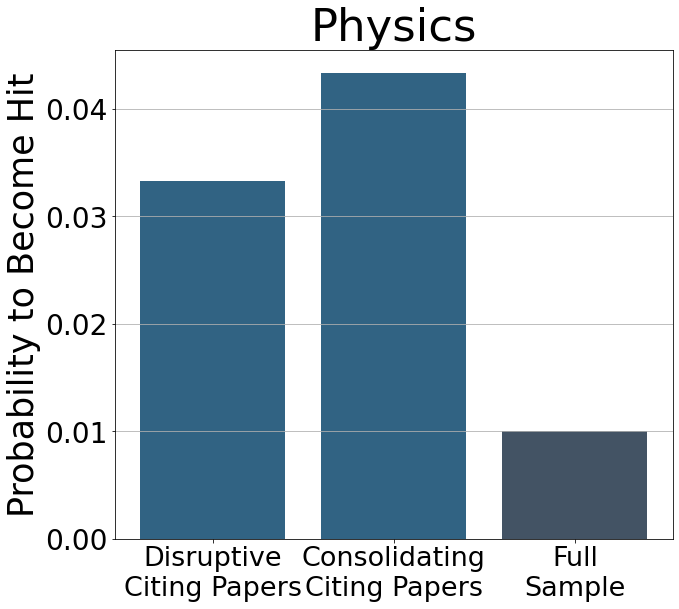

In [36]:
d1 = len(f1h[f1h['Field'] == 'Physics']) / len(f11)
d2 = len(f2h[f2h['Field'] == 'Physics']) / len(f21)
d3 = 0.01
d = [d1,d2,d3]

f, ax = plt.subplots(figsize=(10, 9))
plt.bar(y_pos, d,align='center', color= ['#1A5276','#1A5276',"#2E4053" ],alpha=0.9)
ax.yaxis.grid(True)
#plt.ylim(0,300)
plt.xticks(size = 28)
plt.yticks(size = 28)
plt.xticks([1,2,3],['Disruptive\nCiting Papers' , 'Consolidating\nCiting Papers' , 'Full\nSample'],fontsize = 27)
plt.ylabel(r'Probability to Become Hit',fontsize = 35)
plt.title(r'Physics',fontsize = 45)
ax.set(xlabel="")
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\ASIST Disruptive citation patterns\fig\fig 4.1\b11.pdf",bbox_inches = 'tight')

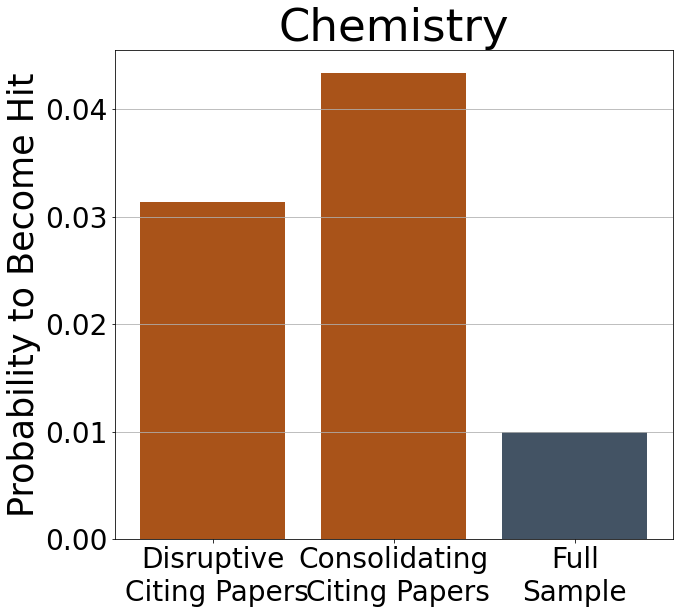

In [37]:
d1 = len(f1h[f1h['Field'] == 'Chemistry']) / len(f12)
d2 = len(f2h[f2h['Field'] == 'Physics']) / len(f21)
d3 = 0.01
d = [d1,d2,d3]

f, ax = plt.subplots(figsize=(10, 9))
plt.bar(y_pos, d,align='center', color= ['#A04000','#A04000',"#2E4053"  ],alpha=0.9)
ax.yaxis.grid(True)
#plt.ylim(0,300)
plt.xticks(size = 28)
plt.yticks(size = 28)
plt.xticks([1,2,3],['Disruptive\n Citing Papers' , 'Consolidating\n Citing Papers' , 'Full\nSample'],fontsize = 28)
plt.ylabel(r'Probability to Become Hit',fontsize = 35)
plt.title(r'Chemistry',fontsize = 45)
ax.set(xlabel="")
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\ASIST Disruptive citation patterns\fig\fig 4.1\b21.pdf",bbox_inches = 'tight')

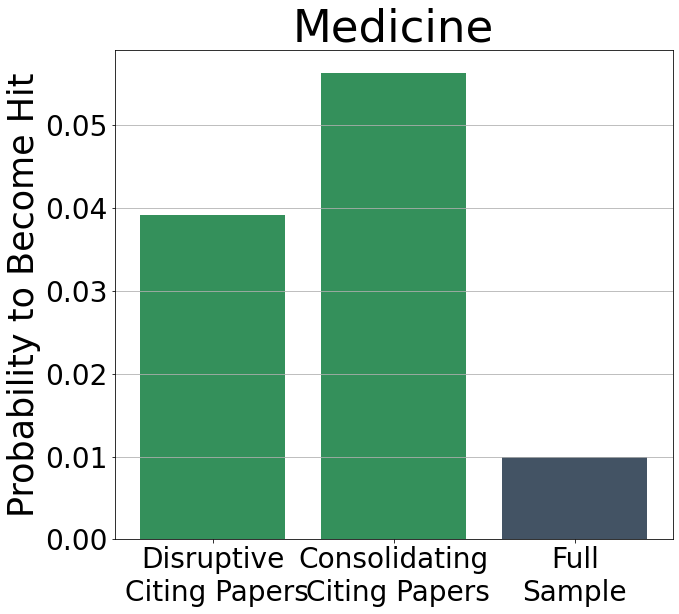

In [38]:
d1 = len(f1h[f1h['Field'] == 'Medicine']) / len(f13)
d2 = len(f2h[f2h['Field'] == 'Medicine']) / len(f23)
d3 = 0.01
d = [d1,d2,d3]

f, ax = plt.subplots(figsize=(10, 9))
plt.bar(y_pos, d,align='center', color= ['#1E8449','#1E8449' ,"#2E4053"],alpha=0.9)
ax.yaxis.grid(True)
#plt.ylim(0,300)
plt.xticks(size = 28)
plt.yticks(size = 28)
plt.xticks([1,2,3],['Disruptive\n Citing Papers' , 'Consolidating\n Citing Papers' , 'Full\nSample'],fontsize = 28)
plt.ylabel(r'Probability to Become Hit',fontsize = 35)
plt.title(r'Medicine',fontsize = 45)
ax.set(xlabel="")
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\ASIST Disruptive citation patterns\fig\fig 4.1\b31.pdf",bbox_inches = 'tight')

<AxesSubplot:xlabel='paperyear', ylabel='Density'>

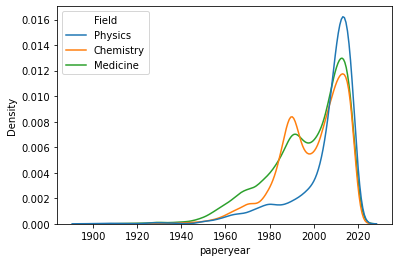

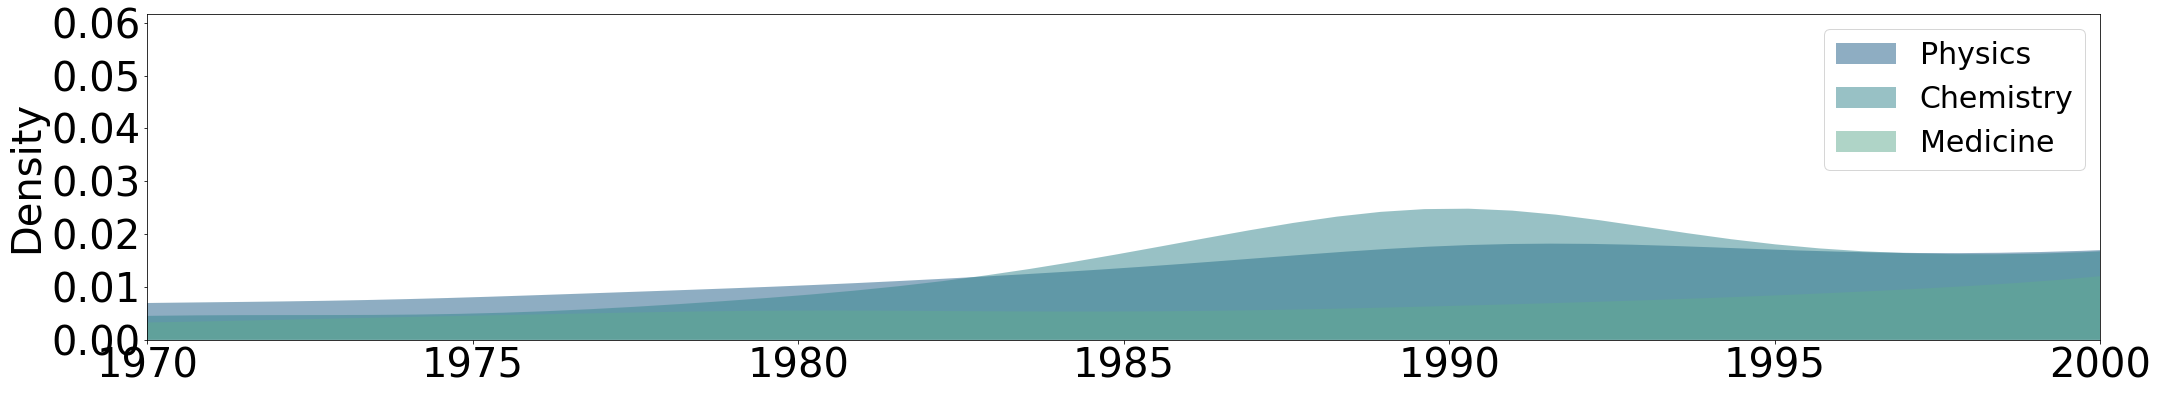

In [192]:
f, ax = plt.subplots(figsize=(35, 6))
sns.kdeplot(data=f1h, x="paperyear" , hue = 'Field',fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

#ax.yaxis.grid(True)
#plt.ylim(0,300)
plt.xlim((1970 , 2000))
plt.xticks( size = 40)
plt.yticks( size = 40)

plt.ylabel("Density" , fontsize = 40)
plt.legend(labels = ['Physics','Chemistry','Medicine'],fontsize = 30)

ax.set(xlabel="")
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\ASIST Disruptive citation patterns\fig\fig 4.1\c.pdf",bbox_inches = 'tight')

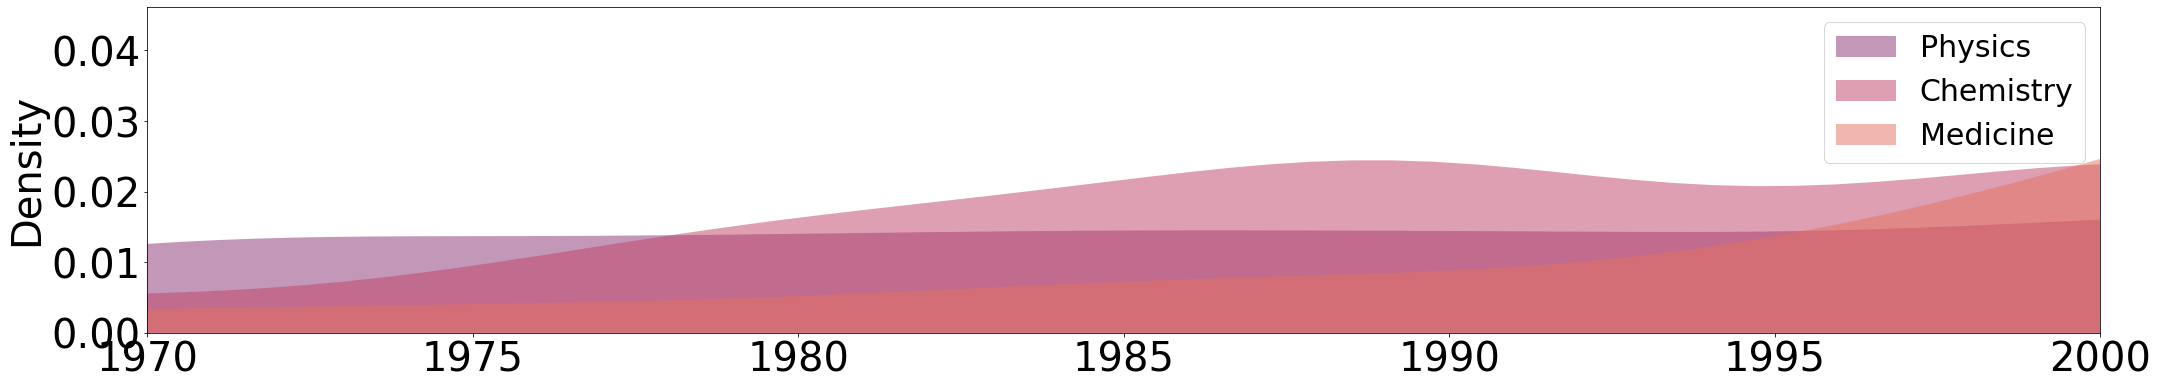

In [191]:
f, ax = plt.subplots(figsize=(35, 6))
sns.kdeplot(data=f2h, x="paperyear" , hue = 'Field' , fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=0,)

#ax.yaxis.grid(True)
#plt.ylim(0,300)
plt.xlim((1970 , 2000))
plt.xticks( size = 40)
plt.yticks( size = 40)

plt.ylabel("Density" , fontsize = 40)
#plt.xlabel("year" , fontsize = 40)
plt.legend(labels = ['Physics','Chemistry','Medicine'],fontsize = 30)
# plt.xticks([1,2],['Disruptive\n Citing Papers' , 'Consolidating\n Citing Papers'],fontsize = 25)
# plt.title(r'Probability to Become Hit',fontsize = 35)
ax.set(xlabel="")
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\ASIST Disruptive citation patterns\fig\fig 4.1\c2.pdf",bbox_inches = 'tight')

